In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import random
import math
from skimage.io import imread, imshow

In [2]:
"""
common.py
"""
def read_img(path, greyscale=True):
    img = Image.open(path)
    if greyscale:
        img = img.convert('L')
    else:
        img = img.convert('RGB')
    return np.array(img) 
    
def save_img(img, path):
    # img = Image.fromarray(img.astype(np.uint8))
    # img.save(path)
    plt.imsave(path, img, cmap='gray')
    print(path, "is saved!")

def display_img(img):
    plt.imshow(img, cmap='gray', interpolation='bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

def normalize(M):
    return (M - M.mean()) / M.std()

In [30]:
"""
filters.py
"""
## Image Patches ##
def image_patches(image, patch_size=(16,16)):
    # Given an input image and patch_size,
    # return the corresponding image patches made
    # by dividing up the image into patch_size sections.
    # Input- image: H x W
    #        patch_size: a scalar tuple M, N 
    # Output- results: a list of images of size M x N

    # TODO: Use slicing to complete the function
    n_rows, n_cols = patch_size
    r, h = image.shape
    output = []
    for i in range(r // n_rows):
        for j in range(h // n_cols):
            i_idx, j_idx = (i * n_rows), (j * n_cols)
            patch = image[i_idx:i_idx + n_rows, j_idx:j_idx + n_cols]
            patch = normalize(patch)
            output.append(patch)
    print(f"Patches: {len(output)} x {output[0].shape}")
    return output


## Gaussian Kernel ##
def gaussian_kernel(l=5, std=1.0):
    # Compute a Gaussian kernel for the given length and standard deviation.
    ax = np.linspace(-(l - 1) / 2.0, (l - 1) / 2.0, l)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(std))
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)


## Gaussian Filter ##
def convolve(image, kernel):
    # Return the convolution result: image * kernel.
    # Reminder to implement convolution and not cross-correlation!
    # Input- image: H x W
    #        kernel: h x w
    # Output- convolve: H x W
    H, W = (np.array(image.shape) - np.array(kernel.shape)) + 1
    output = np.zeros(image.shape)
    for i in range(H):
        for j in range(W):
            window = image[i:i + kernel.shape[0], j:j + kernel.shape[1]]
            y = int((window * kernel).sum())
            output[i, j] = y
    return output


## Edge Detection ##
def edge_detection(image):
    # Return the gradient magnitude of the input image
    # Input- image: H x W
    # Output- grad_magnitude: H x W

    # Fix kx, ky
    kx = np.array([[1, 0, -1]]) / 2  # 1 x 3
    ky = np.array([[1, 0, -1]]).T / 2  # 3 x 1

    Ix = convolve(image, kx)
    Iy = convolve(image, ky)

    # Use Ix, Iy to calculate grad_magnitude
    grad_magnitude = np.sqrt((Ix ** 2 + Iy ** 2))

    return grad_magnitude, Ix, Iy


## Sobel Operator ##
def sobel_operator(image):
    # Return Gx, Gy, and the gradient magnitude.
    # Input- image: H x W
    # Output- Gx, Gy, grad_magnitude: H x W

    # TODO: Use convolve() to complete the function
    Kx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    
    Gx = convolve(image, Kx)
    Gy = convolve(image, Ky)
    grad_magnitude = np.sqrt((Gx ** 2 + Gy ** 2))
    
    return Gx, Gy, grad_magnitude


def steerable_filter(image, angles=[0, np.pi/6, np.pi/3, np.pi/2, np.pi*2/3, np.pi*5/6]):
    # Given a list of angels used as alpha in the formula,
    # return the corresponding images based on the formula given in pdf.
    # Input- image: H x W
    #        angels: a list of scalars
    # Output- results: a list of images of H x W
    # You are encouraged not to use sobel_operator() in this function.

    # gaussian kernels
    Kx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    Ky = Kx.T

    # TODO: Use convolve() to complete the function
    output = []
    for a in angles:
        # steerable-filter
        K_a = math.cos(a) * Kx + math.sin(a) * Ky
        S_Ia = convolve(image, K_a)
        output.append(S_Ia)

    return output

Patches: 888 x (16, 16)
./image_patches/q1_patch0.png is saved!


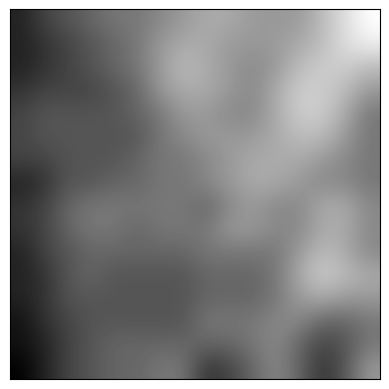

./image_patches/q1_patch1.png is saved!


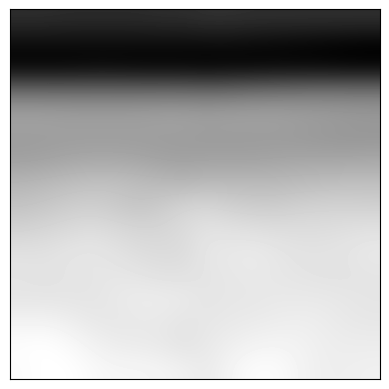

./image_patches/q1_patch2.png is saved!


In [117]:
"""
Question 1.) Image Filtering
Part A.) Image Patches
"""

##### Image Patches #####
if not os.path.exists("./image_patches"):
    os.makedirs("./image_patches")

# Q1
img = read_img('./hw2_files/grace_hopper.png')
patches = image_patches(img)

# choose a few patches and save them
chosen_patches = random.choices(patches, k=3)
for i, patch in enumerate(chosen_patches):
    save_img(patch, f"./image_patches/q1_patch{i}.png")
    display_img(patch)

# Q2: No code
"""
These patches would not make good image descriptors. The raw image
patches are not invariant enough to changes in illumination or viewing geometry.
This descriptor variance is what inspired work in invariant feature extraction. 
"""

./gaussian_filter/q2_gaussian.png is saved!


./gaussian_filter/q3_edge.png is saved!


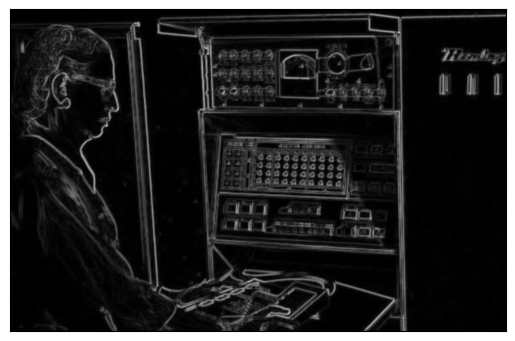

./gaussian_filter/q3_edge_gaussian.png is saved!


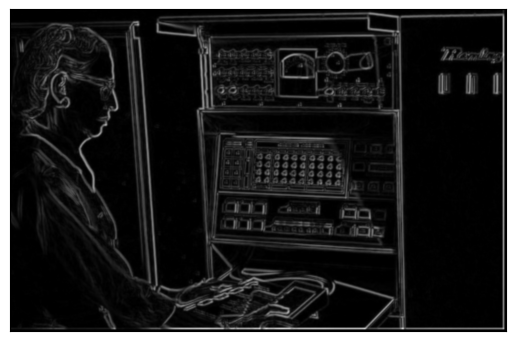

Gaussian Filter is done. 


In [28]:
"""
Question 1.) Image Filtering
Part B.) Gaussian Filter
"""
##### Gaussian Filter #####
if not os.path.exists("./gaussian_filter"):
    os.makedirs("./gaussian_filter")

# Q1: No code

# Q2
img = read_img('./hw2_files/grace_hopper.png')

# Calculate the kernel described in the question.  There is tolerance for the kernel.
kernel_gaussian = gaussian_kernel(l=3, std=math.sqrt(1 / (2 * math.log(2))))

filtered_gaussian = convolve(img, kernel_gaussian)
save_img(filtered_gaussian, "./gaussian_filter/q2_gaussian.png")
display_img(filtered_gaussian)

"""
The Gaussian filter adds a blurring effect to the image.
"""

# Q3 & Q4
edge_detect, _, _ = edge_detection(img)
save_img(edge_detect, "./gaussian_filter/q3_edge.png")
display_img(edge_detect)
edge_with_gaussian, _, _ = edge_detection(filtered_gaussian)
save_img(edge_with_gaussian, "./gaussian_filter/q3_edge_gaussian.png")
display_img(edge_with_gaussian)

"""
The edge-detect image with the original image as input has much more
defined edges or white lines, but also has more noise throughout the entire image.
The edge-detect image with the gaussian-filtered image as input has much of this
noise removed, but at the cost of having the edges slightly blurred.
"""

print("Gaussian Filter is done. ")

./sobel_operator/q2_Gx.png is saved!


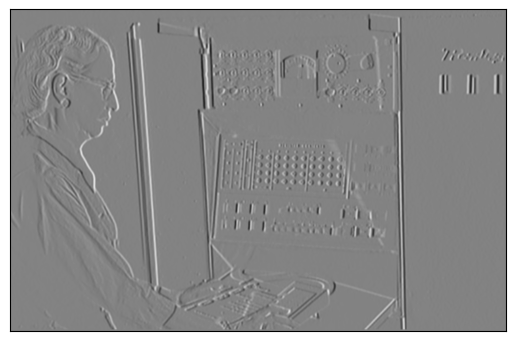

./sobel_operator/q2_Gy.png is saved!


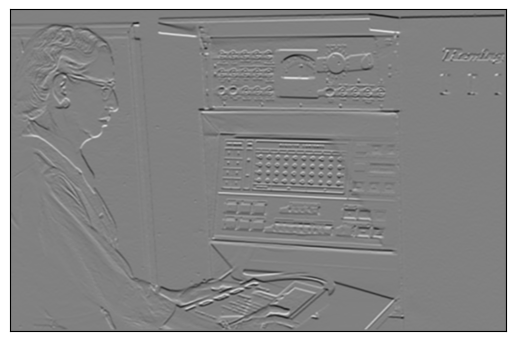

./sobel_operator/q2_edge_sobel.png is saved!


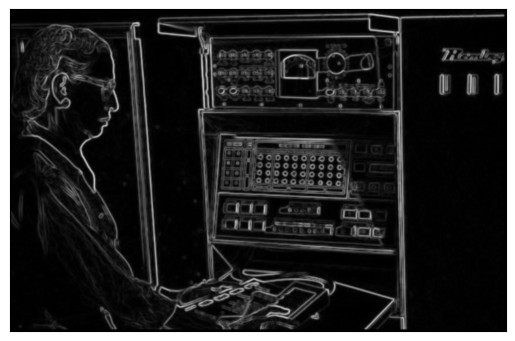

./sobel_operator/q3_steerable_0.png is saved!


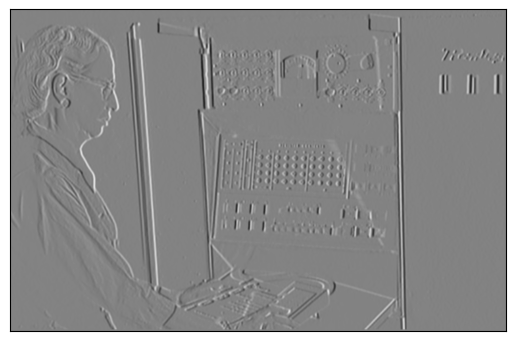

./sobel_operator/q3_steerable_1.png is saved!


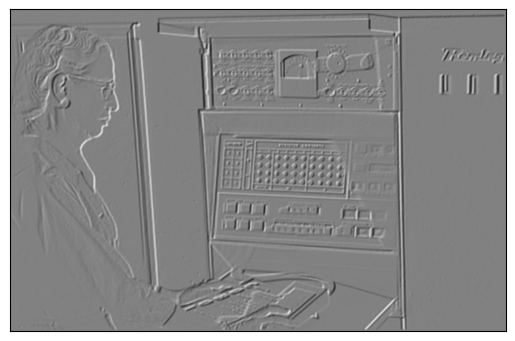

./sobel_operator/q3_steerable_2.png is saved!


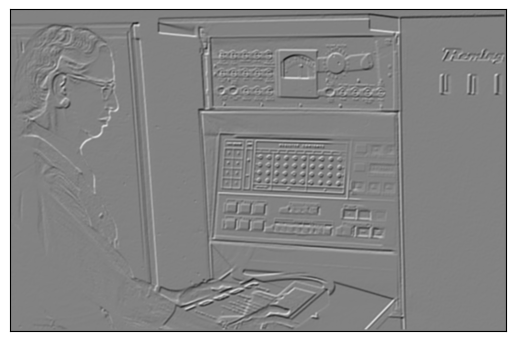

./sobel_operator/q3_steerable_3.png is saved!


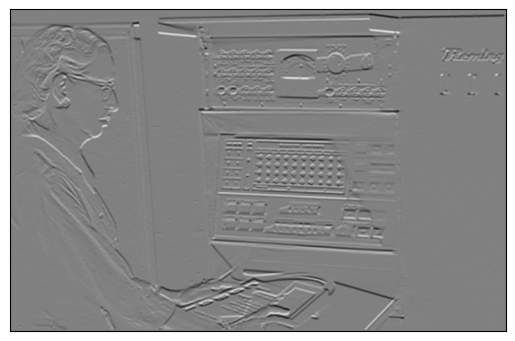

./sobel_operator/q3_steerable_4.png is saved!


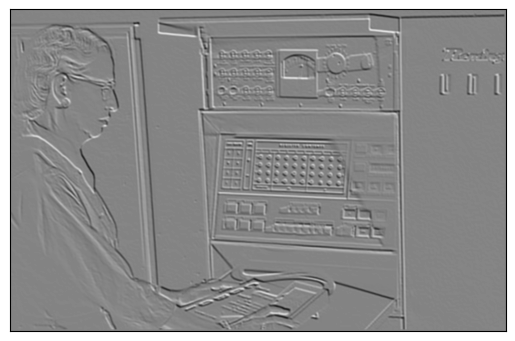

./sobel_operator/q3_steerable_5.png is saved!


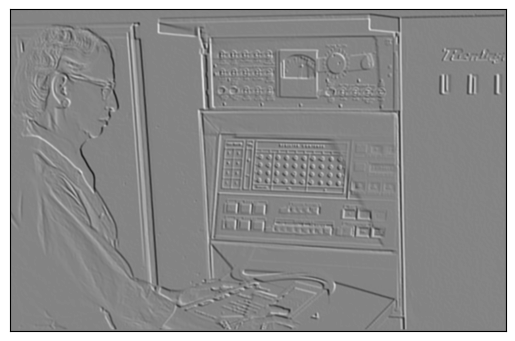

Sobel Operator is done. 


In [34]:
"""
Question 1.) Image Filtering
Part C.) Sobel Operator
"""
##### Sobel Operator #####
if not os.path.exists("./sobel_operator"):
    os.makedirs("./sobel_operator")

# Q1: No code

# Q2
img = read_img('./hw2_files/grace_hopper.png')
Gx, Gy, edge_sobel = sobel_operator(img)

save_img(Gx, "./sobel_operator/q2_Gx.png")
display_img(Gx)
save_img(Gy, "./sobel_operator/q2_Gy.png")
display_img(Gy)
save_img(edge_sobel, "./sobel_operator/q2_edge_sobel.png")
display_img(edge_sobel)

# Q3
steerable_list = steerable_filter(img)
for i, steerable in enumerate(steerable_list):
    save_img(steerable, "./sobel_operator/q3_steerable_{}.png".format(i))
    display_img(steerable)

"""
These kernels detect edges steered in the gradient orientation given by the angle.
In other words, changing the angle will emphasize edges differently according
to the gradient direction.
"""

print("Sobel Operator is done. ")

./log_filter/q1_LoG1.png is saved!


./log_filter/q1_LoG2.png is saved!


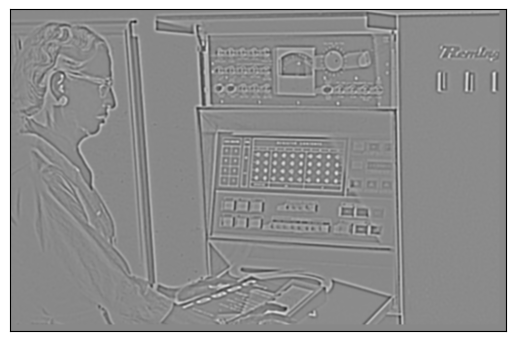

LoG Filter is done. 


In [35]:
"""
Question 1.) Image Filtering
Part D.) LoG Filter
"""
#####LoG Filter#####
if not os.path.exists("./log_filter"):
    os.makedirs("./log_filter")

# Q1
kernel_LoG1 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
kernel_LoG2 = np.array([
    [0, 0, 3, 2, 2, 2, 3, 0, 0],
    [0, 2, 3, 5, 5, 5, 3, 2, 0],
    [3, 3, 5, 3, 0, 3, 5, 3, 3],
    [2, 5, 3, -12, -23, -12, 3, 5, 2],
    [2, 5, 0, -23, -40, -23, 0, 5, 2],
    [2, 5, 3, -12, -23, -12, 3, 5, 2],
    [3, 3, 5, 3, 0, 3, 5, 3, 3],
    [0, 2, 3, 5, 5, 5, 3, 2, 0],
    [0, 0, 3, 2, 2, 2, 3, 0, 0]
])
filtered_LoG1 = convolve(img, kernel_LoG1)
save_img(filtered_LoG1, "./log_filter/q1_LoG1.png")
display_img(filtered_LoG1)
filtered_LoG2 = convolve(img, kernel_LoG2)
save_img(filtered_LoG2, "./log_filter/q1_LoG2.png")
display_img(filtered_LoG2)

"""
The first LoG kernel is an instance of a Positive laplacian filter. This filter
identifies the outward edges of an image.
The second kernel is also a positive laplacian filter but is combined with
a Gaussian operation for smoothing or filtering out noise. The edges in this 
second filtered image appear to be more emphasized, although being more blurry.
"""

# Q2: No code

"""
Consider two Gaussian functions with different variances. The wider one (larger variance)
captures the low-frequency components of an image, while the narrower one captures
the high-frequency details. The result of their difference highlights regions with
a significant change in intensity (edge detection). This produces similar edge-detection
capabilities of the second derivative effect of the LoG.
"""

print("LoG Filter is done. ")

In [101]:
"""
corners.py
"""
def corner_score(image, u=5, v=5, window_size=(5,5)):
    # Given an input image, x_offset, y_offset, and window_size,
    # return the function E(u,v) for window size W
    # corner detector score for that pixel.
    # Input- image: H x W
    #        u: a scalar for x offset
    #        v: a scalar for y offset
    #        window_size: a tuple for window size
    #
    # Output- results: a image of size H x W
    # Use zero-padding to handle window values outside of the image.
    H, W = image.shape
    window_offset = (window_size[0] // 2, window_size[1] // 2)
    window_pad = (u + window_offset[0], v + window_offset[1])
    padded = np.pad(
        image,
        pad_width=window_pad,
        mode='constant',
        constant_values=(0, 0)
    )
    output = np.zeros((H, W))

    # calculate E(u,v) for each pixel
    for i in range(H):
        for j in range(W):
            # offset indices
            iu, jv = i + u, j + v
            
            # original image window
            A_window = padded[i: i + window_size[0], j: j + window_size[1]]
            
            # offset image window
            B_window = padded[iu: iu + window_size[0], jv: jv + window_size[1]]
            
            # sum of squared differences between the windows
            output[i, j] = np.sum((B_window - A_window) ** 2)

    return output

def harris_detector(image, window_size=(5,5)):
    # Given an input image, calculate the Harris Detector score for all pixels
    # Input- image: H x W
    # Output- results: a image of size H x W
    # 
    # You can use same-padding for intensity (or zero-padding for derivatives) 
    # to handle window values outside of the image. 

    alpha = 0.05
    threshold = 0.5

    # Sobel kernels
    Sx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    Sy = Sx.T

    # Gaussian kernel
    G = gaussian_kernel(l=window_size[0])

    # compute the derivatives 
    Ix = convolve(image, Sx)
    Iy = convolve(image, Sy)

    # Gaussian Filter
    Ixx = convolve(Ix * Ix, G)
    Iyy = convolve(Iy * Iy, G)
    Ixy = convolve(Ix * Iy, G)

    # For each location of the image, construct the structure tensor and calculate the Harris response
    det = Ixx * Iyy - (Ixy ** 2)
    trace = Ixx + Iyy
    response = det - alpha * (trace ** 2)

    # apply threshold
    response = response < threshold

    return response

./feature_detection/corner_score.png is saved!


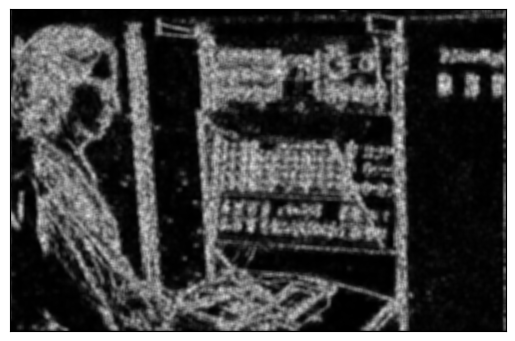

In [85]:
"""
Question 2.) Feature Extraction
Part A.) Corner Score
"""
img = read_img('./hw2_files/grace_hopper.png')

##### Feature Detection ##### 
if not os.path.exists("./feature_detection"):
    os.makedirs("./feature_detection")

# define offsets and window size and calulcate corner score
u, v, W = 0, 2, (5,5)

score = corner_score(img, u, v, W)
save_img(score, "./feature_detection/corner_score.png")
display_img(score)

"""
Using this method and performing an iterative parameter search for the ideal offsets
quickly becomes computationally impractical as you scale the image resolution 
or want to add an additional image dimension. The number and length of nested for-loops
becomes very inefficient.
"""

./feature_detection/harris_response.png is saved!


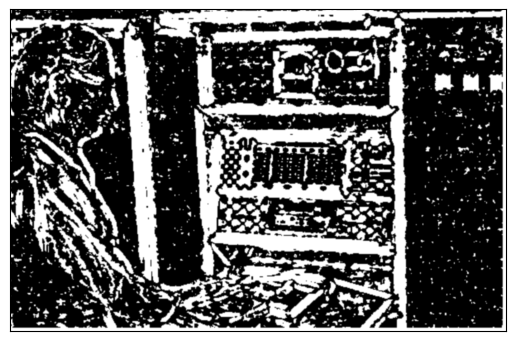

In [102]:
"""
Question 2.) Feature Extraction
Part B.) Harris Corner Detector
"""
img = read_img('./hw2_files/grace_hopper.png')

##### Feature Detection #####  
if not os.path.exists("./feature_detection"):
    os.makedirs("./feature_detection")

harris_corners = harris_detector(img)
save_img(harris_corners, "./feature_detection/harris_response.png")
display_img(harris_corners)

In [46]:
"""
blob_detection.py
"""
def gaussian_filter(image, sigma):
    # Given an image, apply a Gaussian filter with the input kernel size
    # and standard deviation 
    # Input-    image: image of size HxW
    #           sigma: scalar standard deviation of Gaussian Kernel
    # Output-   Gaussian filtered image of size HxW
    H, W = image.shape
    # -- good heuristic way of setting kernel size 
    kernel_size = int(2 * np.ceil(2*sigma) + 1)

    # make sure that kernel size isn't too big and is odd 
    kernel_size = min(kernel_size, min(H,W)//2)     
    if kernel_size % 2 == 0: kernel_size = kernel_size + 1  

    #TODO implement gaussian filtering with size kernel_size x kernel_size 
    # feel free to use your implemented convolution function or a convolution function from a library 
    
    # kernel = gaussian_kernel(l=kernel_size, std=sigma)
    # filtered = convolve(image, kernel)
    # filtered = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
    filtered = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    return filtered

def difference_of_gaussian(image, sigma1, sigma2):
    # Computes the Difference of Gaussians (DoG)
    g1 = gaussian_filter(image, sigma1)
    g2 = gaussian_filter(image, sigma2)
    return g1 - g2

def scale_space(image, min_sigma, k=np.sqrt(2), S=8):
    # Calcualtes a DoG scale space of the image
    # Input-    image: image of size HxW
    #           min_sigma: smallest sigma in scale space
    #           k: scalar multiplier for scale space
    #           S: number of scales considers
    # Output-   Scale Space of size HxWx(S-1)
    output = np.zeros((S - 1, image.shape[0], image.shape[1]))
    for i in range(S - 1):
        sigma1 = min_sigma * (k ** i)
        sigma2 = min_sigma * (k ** (i + 1))
        output[i] = difference_of_gaussian(image, sigma1, sigma2)

    output = np.swapaxes(output, 0, -1)
    return output

##### You shouldn't need to edit the following 3 functions 
def find_maxima(scale_space, k_xy=5, k_s=1):
    # Extract the peak x,y locations from scale space
    # Input-    scale_space: Scale space of size HxWxS
    #           k: neighborhood in x and y 
    #           ks: neighborhood in scale
    # Output-   list of (x,y) tuples; x<W and y<H
    if len(scale_space.shape) == 2:
        scale_space = scale_space[:, :, None] 

    H,W,S = scale_space.shape
    maxima = []
    for i in range(H):
        for j in range(W):
            for s in range(S):
                # extracts a local neighborhood of max size (2k_xy+1, 2k_xy+1, 2k_s+1)
                neighbors = scale_space[max(0, i-k_xy):min(i+k_xy,H), 
                                        max(0, j-k_xy):min(j+k_xy,W), 
                                        max(0, s-k_s) :min(s+k_s,S)]
                mid_pixel = scale_space[i,j,s]
                num_neighbors = np.prod(neighbors.shape) - 1
                # if mid_pixel is larger than all the neighbors; append maxima 
                if np.sum(mid_pixel > neighbors) == num_neighbors:
                    maxima.append( (i,j,s) )
    return maxima

def visualize_scale_space(scale_space, min_sigma, k, file_path=None):
    # Visualizes the scale space
    # Input-    scale_space: scale space of size HxWxS
    #           min_sigma: the minimum sigma used 
    #           k: the sigma multiplier 
    if len(scale_space.shape) == 2:
        scale_space = scale_space[:, :, None] 
    H, W, S = scale_space.shape

    # number of subplots
    p_h = int(np.floor(np.sqrt(S))) 
    p_w = int(np.ceil(S/p_h))
    for i in range(S):
        plt.subplot(p_h, p_w, i+1)
        plt.axis('off')
        plt.title('{:.1f}:{:.1f}'.format(min_sigma * k**i, min_sigma * k**(i+1)))
        plt.imshow(scale_space[:, :, i])

    # plot or save to fig 
    if file_path:
        plt.savefig(file_path)
    else:
        plt.show()    

def visualize_maxima(image, maxima, min_sigma, k, file_path=None):
    # Visualizes the maxima on a given image
    # Input-    image: image of size HxW
    #           maxima: list of (x,y) tuples; x<W, y<H
    #           file_path: path to save image. if None, display to screen
    # Output-   None 
    H, W = image.shape
    fig,ax = plt.subplots(1)
    ax.imshow(image)
    for maximum in maxima:
        y,x,s= maximum 
        assert x < W and y < H and x >= 0 and y >= 0
        radius = np.sqrt(2 * min_sigma * (k ** s))
        circ = plt.Circle((x, y), radius, color='r', fill=False)
        ax.add_patch(circ)

    if file_path:
        plt.savefig(file_path)
    else:
        plt.show()

def binarize(image, threshold=0.5):
    # Binarizes the given image
    return ((image / 255.0) < threshold) * 1.0

Detect small polka dots
3.7 3.8


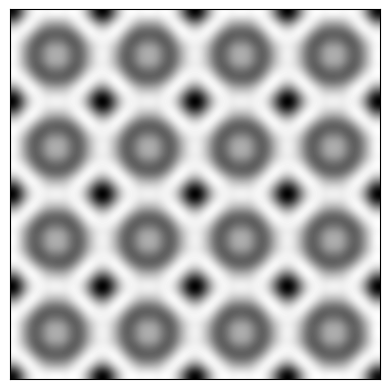

Detect large polka dots
8.0 9.0


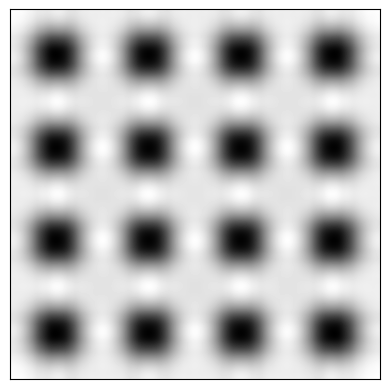

In [352]:
"""
Question 3.) Blob Detection
Part A.) Single-scale Blob Detection
"""
image = read_img('./hw2_files/polka.png')
image = binarize(image)

### -- Detecting Polka Dots -- ## 
print("Detect small polka dots")

# -- Detect Small Circles
sigma_small1 = 3.7
sigma_small2 = 3.8
print(sigma_small1, sigma_small2)

# calculate difference of gaussians
DoG_small = difference_of_gaussian(image, sigma_small1, sigma_small2)
display_img(DoG_small)

# -- Detect Large Circles
print("Detect large polka dots")
sigma_large1 = 8.0
sigma_large2 = 9.0
print(sigma_large1, sigma_large2)

# calculate difference of gaussians 
DoG_large = difference_of_gaussian(image, sigma_large1, sigma_large2)
display_img(DoG_large)

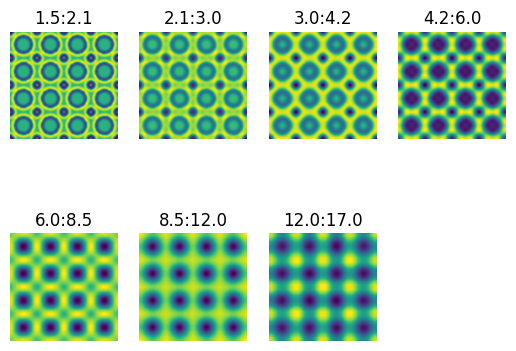

In [334]:
"""
Question 3.) Blob Detection
Part B.) Scale Space Representation
"""
image = read_img('./hw2_files/polka.png')
image = binarize(image)
S, k = 8, np.sqrt(2)

# -- Detect Small Circles
min_sigma = 1.5 # sigma_small1
space = scale_space(image=image, min_sigma=min_sigma, k=k, S=S)
visualize_scale_space(space, min_sigma, k, 'polka_scalespace_small.png')

In [331]:
# -- Detect Large Circles
min_sigma = sigma_large1
space = scale_space(image=image, min_sigma=min_sigma, k=k, S=S)
visualize_scale_space(space, min_sigma, k, 'polka_scalespace_large.png')

39
16


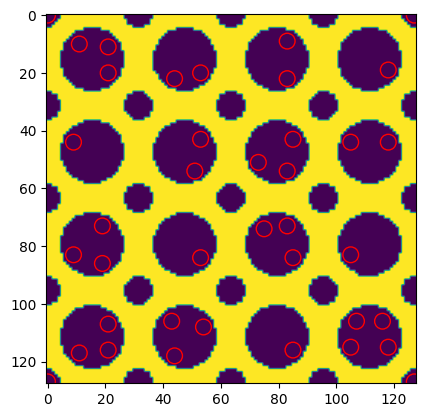

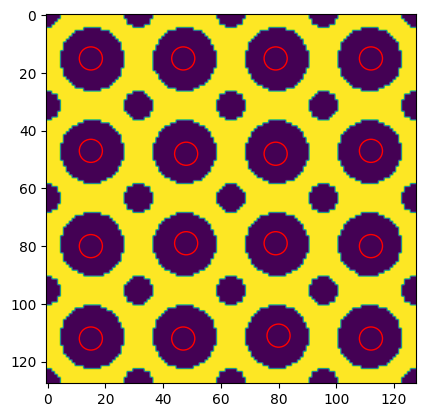

In [354]:
"""
Question 3.) Blob Detection
Part C.) Blob Detection
"""
image = read_img('./hw2_files/polka.png')
image = binarize(image)

# -- Detect Small Circles
# visualize maxima 
sigma_1, sigma_2 = sigma_small1, sigma_small2
maxima = find_maxima(-DoG_small, k_xy=8)
print(len(maxima))
visualize_maxima(image, maxima, sigma_1, sigma_2/sigma_1, 'polka_small.png')

# -- Detect Large Circles
# visualize maxima 
sigma_1, sigma_2 = sigma_large1, sigma_large2
maxima = find_maxima(-DoG_large, k_xy=10)
print(len(maxima))
visualize_maxima(image, maxima, sigma_1, sigma_2/sigma_1, 'polka_small.png')


./hw2_files/cells/031cell.png


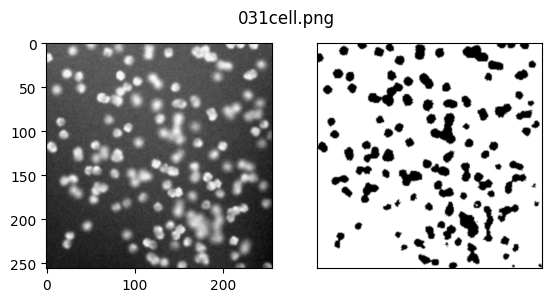

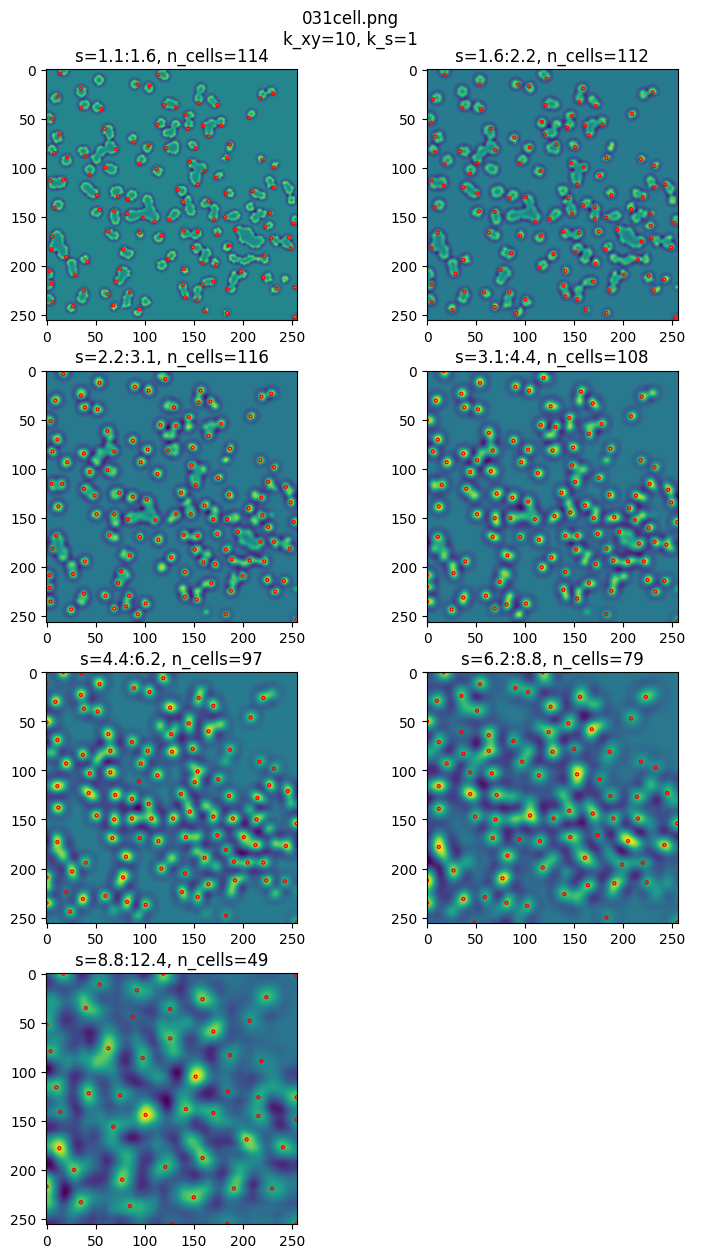

./hw2_files/cells/054cell.png


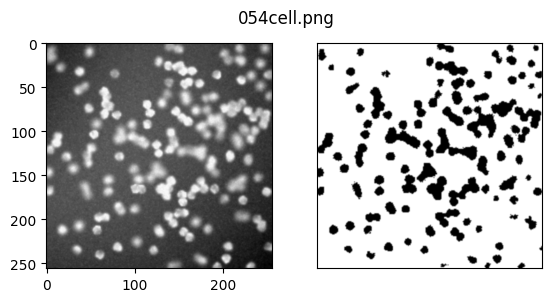

./hw2_files/cells/073cell.png


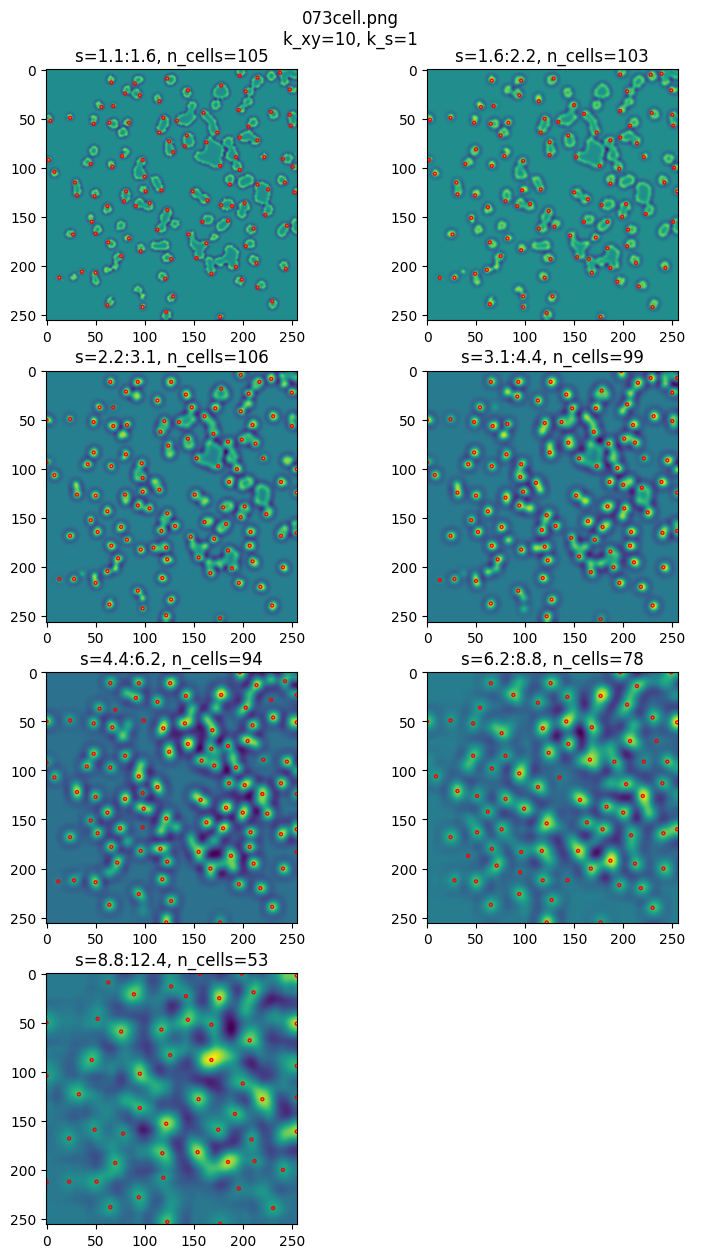

./hw2_files/cells/106cell.png


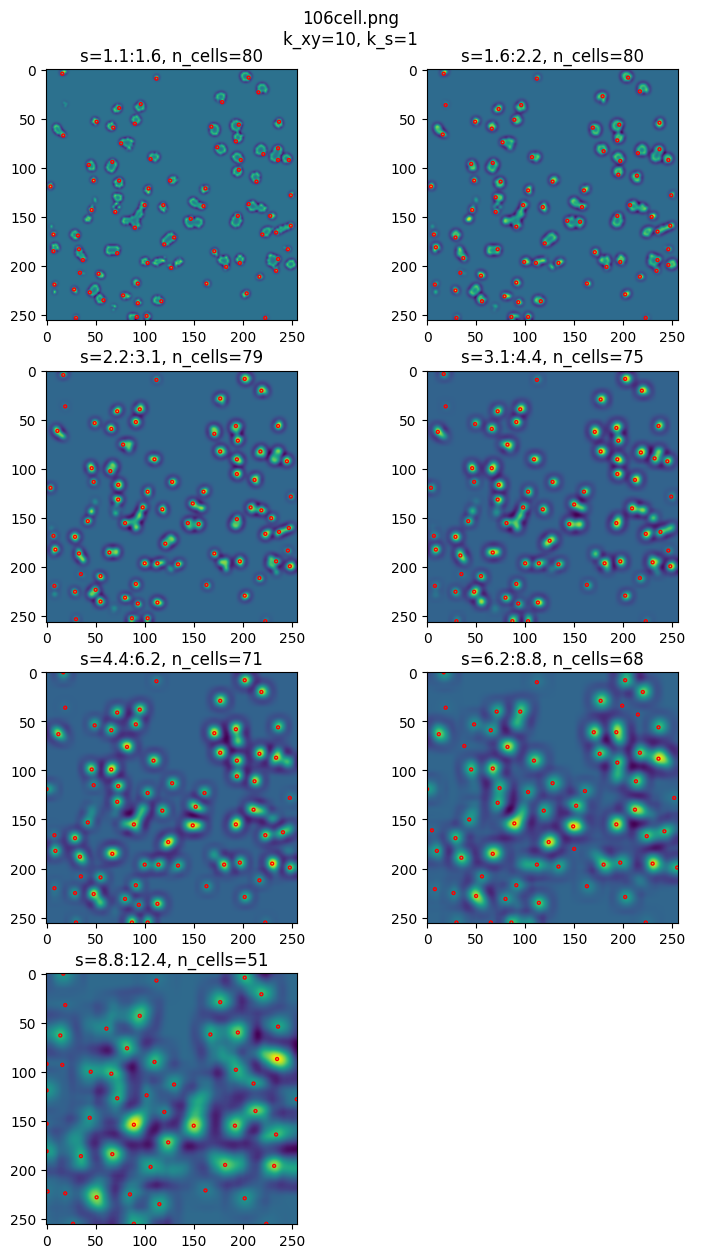

In [76]:
"""
Question 3.) Blob Detection
Part D.) Cell Counting
"""
# four random image samples
image_paths = [
    './hw2_files/cells/031cell.png',
    './hw2_files/cells/054cell.png',
    './hw2_files/cells/073cell.png',
    './hw2_files/cells/106cell.png',
]

for path in image_paths:
    # load & display image
    image_name = os.path.basename(path)
    fig, axs = plt.subplots(1, 2)
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    fig.suptitle(image_name, y=0.80)
    
    print(path)
    image = read_img(path, greyscale=True)
    axs[0].imshow(image, cmap='gray', interpolation='bicubic')
    image = binarize(image, threshold=0.07)
    axs[1].imshow(image, cmap='gray', interpolation='bicubic')
    fig.savefig(f"preprocess_{image_name}", transparent=True)
    plt.show()

    # scale space
    S, k = 8, np.sqrt(2)
    min_sigma = 1.1
    space = scale_space(image=image, min_sigma=min_sigma, k=k, S=S)
    H, W, S = space.shape
    # visualize_scale_space(space, min_sigma, k)

    # maxima
    p_h, p_w = int(np.ceil(S / 2)), 2
    k_xy, k_s = 10, 1
    fig, axs = plt.subplots(p_h, p_w, figsize=(9, 15))
    fig.suptitle(f"{image_name}\nk_xy={k_xy}, k_s={k_s}", y=0.92)
    for i in range(S):
        # infer scaled sigma values
        sigma_1 = min_sigma * k**i
        sigma_2 = min_sigma * k**(i+1)

        # calculate scaled image maxima
        scale_image = -space[:, :, i]
        maxima = find_maxima(scale_image, k_xy=k_xy, k_s=k_s)
        n_cells = len(maxima)

        # plot scaled image & maxima
        ax = axs[i // 2, i % 2]
        plt.axis('off')
        ax.title.set_text('s={:.1f}:{:.1f}, n_cells={}'.format(sigma_1, sigma_2, n_cells))
        ax.imshow(scale_image)
        for maximum in maxima:
            y,x,s= maximum 
            assert x < W and y < H and x >= 0 and y >= 0
            radius = np.sqrt(2 * min_sigma * (k ** s))
            circ = plt.Circle((x, y), radius, color='r', fill=False)
            ax.add_patch(circ)

    # display cell subplots
    fig.savefig(f"maxima_{image_name}", transparent=True)
    plt.show()